## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Countries_exercise.csv'</i>.

In [2]:
# Load the data
raw_data = pd.read_csv('C:/Users/jsdha/Videos/phyton/eict python practise/crime_data.csv')
# Check the data
raw_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## Select the features

Make sure to select the appropriate features since we are no longer using the categorical variable for our clustering but rather 'Longitude' and 'Laditude'.

In [3]:
x = raw_data.iloc[:,1:5]


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(x)
scaled_x=pd.DataFrame(scaled,columns=['Murder','Assault','UrbanPop','Rape'])

## Clustering

## Selecting the number of clusters

### WCSS

Use the ingerated <i>sklearn</i> method <i> 'inertia_' </i>.

a loop that calculates and saves the WCSS for any number of clusters from 1 up to 10 


In [6]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for.
# Note that 'range' doesn't include the upper boundery
cl_num = 11
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

C:\Users\jsdha\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

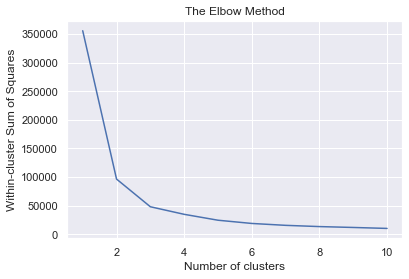

In [7]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

**In this case, 2,3,4 are considerable cluster numbers**


**for 2 cluster groups**

In [8]:
kmeans = KMeans(2)
kmeans.fit(scaled_x)

KMeans(n_clusters=2)

In [9]:
identified_clusters = kmeans.fit_predict(scaled_x)

In [10]:
data_with_clusters = raw_data.copy()
data_with_clusters['Cluster'] = identified_clusters

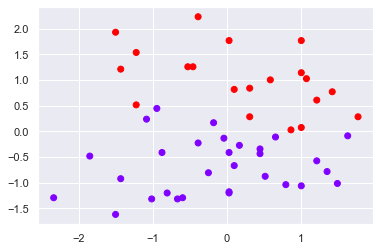

In [11]:
plt.scatter(scaled_x['UrbanPop'], scaled_x['Murder'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.show()

**two clear cluster, but this is not telling much about the underlying logic**

1. cities with low 'Urban pop' have a 'murder'scale all over,ie, both low and high

2. cluster that represent high 'urban pop' have considerable high murder scale.

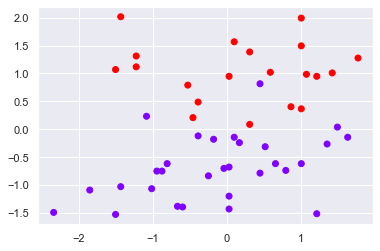

In [12]:
plt.scatter(scaled_x['UrbanPop'], scaled_x['Assault'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.show()

**two clear cluster, but this is not telling much about the underlying logic**, 

1. cities with low 'Urban pop' have a 'Assault'scale all over,ie, both low and high

2. cluster that represent high 'urban pop' have considerable high Assault scale.

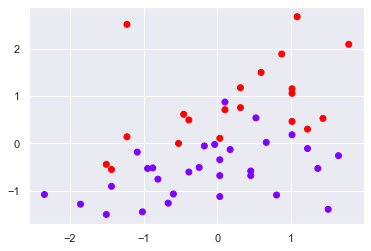

In [13]:
plt.scatter(scaled_x['UrbanPop'], scaled_x['Rape'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.show()

**two clear cluster**

1. cities with low 'Urban pop' have a 'Rape'scale all over,ie, both low and high, 

2. cluster that represent high 'urban pop' have concentrated high rape scale.

**for 3 cluster groups**

In [14]:
kmeans = KMeans(3)
kmeans.fit(scaled_x)

KMeans(n_clusters=3)

In [15]:
identified_clusters = kmeans.fit_predict(scaled_x)

In [16]:
data_with_clusters = raw_data.copy()
data_with_clusters['Cluster'] = identified_clusters


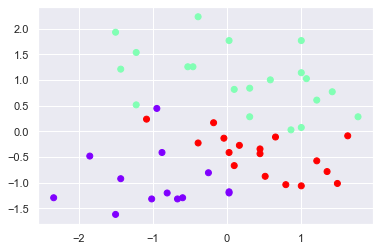

In [17]:
plt.scatter(scaled_x['UrbanPop'], scaled_x['Murder'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.show()

**three clear cluster** 

1. cities with low 'Urban pop' have a little spread out murder scale, ie not concentrated, but still the cluster tells, murders are low

2. cluster that represent high 'urban pop' have considerable low murder scale.

3. cities cluster representing high murder scale have a spread out urban pop scale, but most concentration is in high urban pop scale**

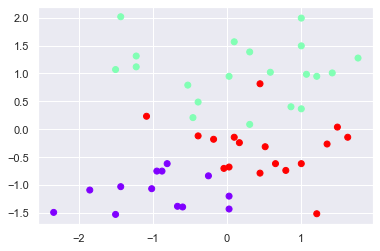

In [18]:
plt.scatter(scaled_x['UrbanPop'], scaled_x['Assault'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.show()

**three clear cluster**


1. cities with low 'Urban pop' have a low Assault scale,  
 
2. cluster that represent high 'urban pop' have considerable low Assault scale.

3. cities cluster representing high Assault scale have a  concentration in high urban pop scale

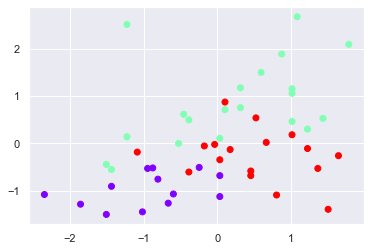

In [19]:
plt.scatter(scaled_x['UrbanPop'], scaled_x['Rape'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.show()

**three unclear cluster, or two clear but third mixed in others**
1. cities with low 'Urban pop' have a low Rape scale,  
2. cluster that represent high 'urban pop' have considerable low Rape scale.
3. and cities cluster representing high rape scale have a  little concentration in high urban pop scale

**for 4 cluster groups**

In [20]:
kmeans = KMeans(4)
kmeans.fit(scaled_x)

KMeans(n_clusters=4)

In [21]:
identified_clusters = kmeans.fit_predict(scaled_x)

In [22]:
data_with_clusters = raw_data.copy()
data_with_clusters['Cluster'] = identified_clusters


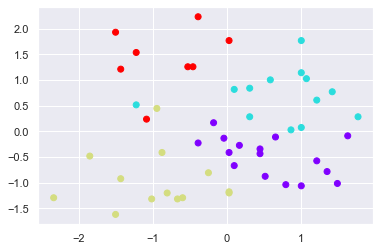

In [23]:
plt.scatter(scaled_x['UrbanPop'], scaled_x['Murder'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.show()

**there are four clear clusters**
1. Cities cluster with highest mureder scale are concentrated in less urban pop scale
2. cities cluster representing second highest murder scale are concentrated in hgh urban pop areas.
3. cities with low urban pop have a considerable less scale of murder scale
4. and there's also a group with high urban pop scale and considerably less murder scale

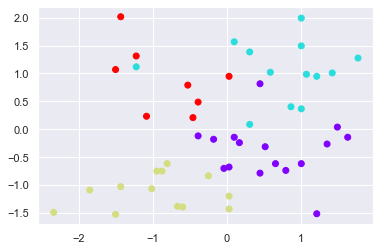

In [24]:
plt.scatter(scaled_x['UrbanPop'], scaled_x['Assault'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.show()

**there are four clear clusters**
1. Cities cluster with highest mureder scale are concentrated in high urban pop scale
2. cities cluster representing second highest murder scale are concentrated in low urban pop areas.
3. cities with low urban pop have a considerable less scale of assault case
4. and there's also a group with high urban pop scale and considerably less assault scale